Import the necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Read in the data

In [140]:
df = pd.read_csv('countries_mbti.csv')

In [141]:
df

,Country,E,N,T,P,A
0,Austria,46.52,67.76,41.45,57.53,42.33
1,Belgium,49.89,64.69,37.09,58.29,41.87
2,Czechia,43.26,65.29,45.43,57.34,41.17
3,Denmark,49.29,63.03,36.77,56.44,45.99
4,Estonia,43.08,64.43,42.04,57.46,38.92
5,Finland,40.70,62.50,40.42,58.84,42.04
6,France,49.00,61.29,42.05,56.78,42.95
7,Germany,43.83,65.62,42.10,56.46,42.00
8,Greece,50.03,66.47,45.85,52.31,39.39
9,Hungary,44.93,67.01,45.60,54.20,40.69


Import libraries for training

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [245]:
dffilt = df

In [199]:
dffilt = df[(df['Country'] != 'Switzerland')
        & (df['Country'] != 'USA') 
        & (df['Country'] != 'Canada') 
        & (df['Country'] != 'Luxembourg')
        & (df['Country'] != 'Sweden') ]
#         & (df['Country'] != 'Netherlands')]

In [215]:
df1 = scaler.fit_transform(dffilt.drop('Country',axis=1))

In [216]:
df1

array([[ 0.01679388,  1.22486489,  0.08537384,  0.67776578,  0.17354175],
       [ 0.87046709,  0.13197952, -0.85302093,  1.03437485,  0.01991463],
       [-0.80901463,  0.34557275,  0.9419819 ,  0.58861351, -0.21386577],
       [ 0.7184778 , -0.45896175, -0.92189394,  0.1663133 ,  1.39587926],
       [-0.85461142,  0.03942245,  0.21235845,  0.64492021, -0.96530277],
       [-1.45750229, -0.64763577, -0.13631117,  1.29244721,  0.07668987],
       [ 0.6450163 , -1.07838212,  0.21451073,  0.32584893,  0.38060438],
       [-0.6646248 ,  0.46304903,  0.22527214,  0.17569774,  0.06333099],
       [ 0.90593126,  0.76563944,  1.03237772, -1.77157548, -0.80833593],
       [-0.38597776,  0.95787335,  0.97857068, -0.88474502, -0.37417233],
       [ 0.54622326,  0.54848632, -1.53959875,  1.61151849,  0.34386746],
       [-0.85967773,  2.0827977 ,  0.57609403, -0.85189945, -1.77685472],
       [-1.12312584, -0.28096739,  1.61779831,  1.27837054, -1.33601169],
       [-1.93626858,  0.67664226,  1.8

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
X = df1
y = dffilt['Country']

In [230]:
kn = KNeighborsClassifier(n_neighbors=1)

In [225]:
kn.fit(X,y)

KNeighborsClassifier()

In [226]:
xtest = np.array([70,60,27,33,60]).reshape(1,-1)
xtest = scaler.transform(xtest)

In [227]:
xtest

array([[  5.96464167,  -1.53760757,  -3.02467302, -10.83226127,
          6.07482695]])

In [235]:
k = kn.predict(xtest)

In [237]:
k[0]

'Switzerland'

<AxesSubplot:ylabel='Frequency'>

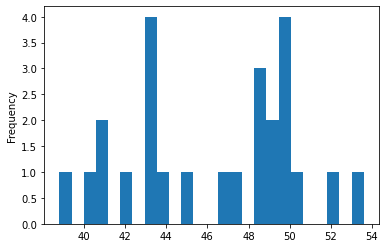

In [33]:
df['E'].plot.hist(bins=25)

In [250]:
pred = []
dffilt = df
for i in range(df.shape[0]):
    df1 = scaler.fit_transform(dffilt.drop('Country',axis=1))
    X = df1
    y = dffilt['Country']
    kn = KNeighborsClassifier(n_neighbors=1)
    kn.fit(X,y)
    xtest = np.array([70,60,27,33,60]).reshape(1,-1)
    xtest = scaler.transform(xtest)
    pred.append(kn.predict(xtest)[0])
    dffilt = dffilt[dffilt['Country'] != pred[-1]]

**Top Countries**

In [252]:
pred

['Switzerland',
 'USA',
 'Luxembourg',
 'Canada',
 'Sweden',
 'Netherlands',
 'Norway',
 'Denmark',
 'Greece',
 'France',
 'Slovenia',
 'Spain',
 'Malta',
 'Hungary',
 'Slovakia',
 'Germany',
 'Belgium',
 'Austria',
 'Iceland',
 'Czechia',
 'Estonia',
 'Italy',
 'Finland',
 'Poland',
 'Lithuania',
 'Portugal',
 'Latvia']